### Natural Language Processing and the Sentiment Analysis

In [40]:
import tweepy
from textblob import TextBlob
import preprocessor as p
import statistics
from typing import List
import configparser
from wordcloud import WordCloud
import nltk

import matplotlib
from matplotlib import pyplot as plt

In [3]:
from PIL import Image
import numpy as np

### API Configuration

In [ ]:

config = configparser.ConfigParser()
config.read('config_suha.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [5]:
# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
def get_tweets(keyword: str) -> List[str]:
    all_tweets = []
    for tweet in tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode='extended', lang='en').items(500):   
        all_tweets.append(tweet.full_text)
        
        
    return all_tweets

def clean_tweets(all_tweets: List[str]) -> List[str]:
    tweets_clean = []
    for tweet in all_tweets:
        tweets_clean.append(p.clean(tweet))
        
    return tweets_clean

def get_sentiment(all_tweets: List[str]) -> List[float]:
    sentiment_scores = []
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
        
    return sentiment_scores

def generate_average_sentiment_score(keyword: str) -> int:
    tweets = get_tweets(keyword)
    tweets_clean = clean_tweets(tweets)
    sentiment_scores = get_sentiment(tweets_clean)
    
    average_score = statistics.mean(sentiment_scores)
    
    return average_score

### Retrieving the information from Twitter

In [7]:
tweet_list = get_tweets('@batman')
tweet_list

['RT @SubicStevan: Because I love everything about this character &amp; finally have few days to spend with him | BATMAN 🖤 @dccomics @batman @the…',
 'RT @SubicStevan: Because I love everything about this character &amp; finally have few days to spend with him | BATMAN 🖤 @dccomics @batman @the…',
 '@therealsupes Should be @Batman',
 'You are my @Batman?! https://t.co/VcKLwctFr3',
 '@batman moments with the boys',
 '@Xiorcal_nft @ApeGangNFT Alfred is dead in the new @batman ?',
 'The Riddler @Batman https://t.co/ZLUTvjYwhr',
 "I'm excited for a new @batman movie! Ready to watch @thebatman with my boo. 💚 D-Box style to keep my #ADHD in check. 😜 \n\n#TeamEdward @ Galaxy Theatres Atascadero https://t.co/jKNNn30ioL",
 '@BatmanFNcomm All thanks to our leader @batman and @BatmanBugha',
 '@ZachBurrell10 Ayo @batman give her some million $s asap',
 'RT @ayyyzion: @ProjectBon @Batman The first season of the Insanity SMP has ended quite abruptly. I will not be explaining why in this video…',
 '@P

In [8]:
tweets_cleaned = clean_tweets(tweet_list)
tweets_cleaned

[': Because I love everything about this character &amp; finally have few days to spend with him | BATMAN',
 ': Because I love everything about this character &amp; finally have few days to spend with him | BATMAN',
 'Should be',
 'You are my ?!',
 'moments with the boys',
 'Alfred is dead in the new ?',
 'The Riddler',
 "I'm excited for a new movie! Ready to watch with my boo. D-Box style to keep my in check. Galaxy Theatres Atascadero",
 'All thanks to our leader and',
 'Ayo give her some million $s asap',
 ': The first season of the Insanity SMP has ended quite abruptly. I will not be explaining why in this video',
 'The first season of the Insanity SMP has ended quite abruptly. I will not be explaining why in this video, it is very complicated, but no, the SMP is not gone for good.',
 'A new Riddler comic book hits stores this October with "Riddler: Year One". Written by Paul Dano, unmask your first look here and see only in theaters now.',
 "Don't teet",
 'I hate you',
 'I really 

#### Tokenization

In [9]:
####decompose a list of sentences into tokens(words) 

def decompose_word(doc):
    txt = []
    for word in doc:
        txt.extend(word.split())
    return txt

###using self-defined function to decompose a list of sentences
tokens = decompose_word(tweets_cleaned)

#### using NLTK module to decompose a list of sentences into words 
tokens_nltk = nltk.word_tokenize(str(tweets_cleaned))  

In [34]:
### shaping a Wordcloud

from wordcloud import WordCloud 

comment_words = ' '
for token in tokens:
    comment_words = comment_words + token + ' '

wordcloud = WordCloud(width = 800, height = 800, mask=mask1, 
                background_color ='black',
                min_font_size = 10).generate(comment_words)


### Creating the Word Cloud


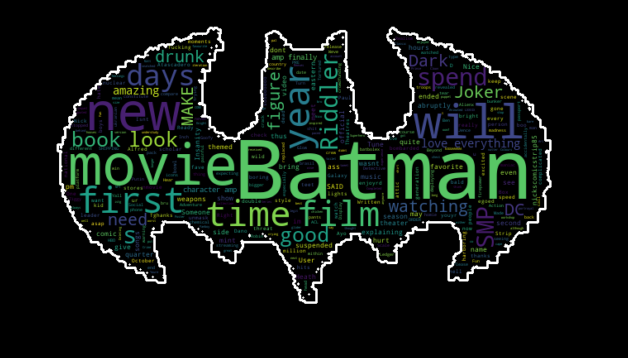

In [39]:
### Plotting Wordcloud

mask1 = np.array(Image.open(r"C:/Users/madaw/twitter project/bat.png"))
wc = WordCloud(mask=mask1, background_color="black",contour_width=2,contour_color='white', 
                       max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(comment_words)
plt.figure(figsize=(11,11), facecolor='black')
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


In [13]:
generate_average_sentiment_score('@thebatman')

0.15649969001022127

In [14]:
generate_average_sentiment_score('@joker')

0.13863636363636364

In [15]:
generate_average_sentiment_score('@joker')

0.13863636363636364

In [16]:
generate_average_sentiment_score('@batman')

0.0275911388839471

In [17]:
generate_average_sentiment_score('@catwoman')

0.5

In [18]:
generate_average_sentiment_score('@robertpattinson')

0.09117670877874959

In [19]:
generate_average_sentiment_score('@gotham')

0.23180119936549362

In [20]:
generate_average_sentiment_score('@BruceWayne')

0.10000000000000002

In [21]:
generate_average_sentiment_score('@riddler')

-0.09551282051282052

In [ ]:
generate_average_sentiment_score('@boxoffice')

In [ ]:
generate_average_sentiment_score('@glasgow')

In [ ]:
generate_average_sentiment_score('@cineworld')

In [ ]:
generate_average_sentiment_score('@cinema')

In [ ]:
generate_average_sentiment_score('@dc')

In [ ]:
generate_average_sentiment_score('@imdb')